In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\PFP\Projects\Uber Trips Analysis\uber-raw-data-sep14.csv")
data.head()


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)


In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [5]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)

In [6]:
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [7]:
data.shape

(1028136, 7)

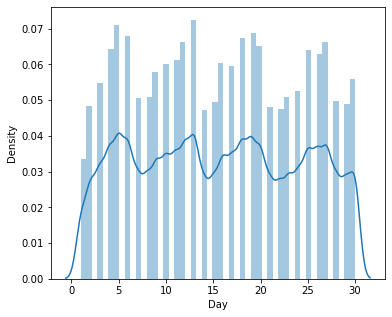

In [8]:
plt.figure(figsize=(6,5))
sns.distplot(data["Day"])
plt.show()

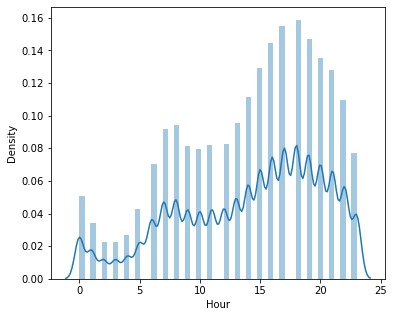

In [9]:
plt.figure(figsize=(6, 5))
sns.distplot(data["Hour"])
plt.show()


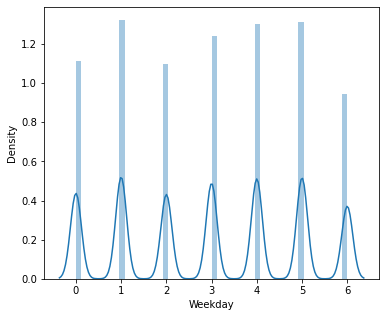

In [10]:
plt.figure(figsize=(6, 5))
sns.distplot(data["Weekday"])
plt.show()


In [11]:
df = data.groupby(["Weekday","Hour"]).apply(lambda x:len(x))
df = df.unstack()

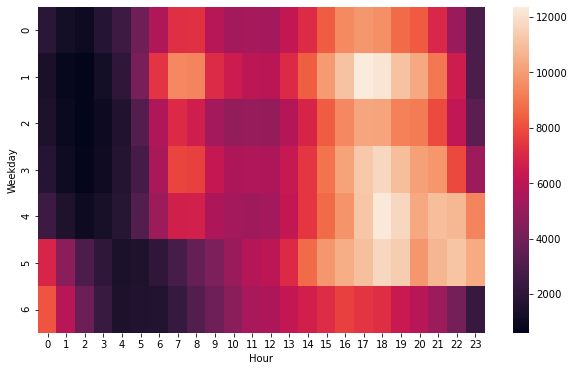

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df)
plt.show()

In [13]:
data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Day', 'Weekday', 'Hour'], dtype='object')

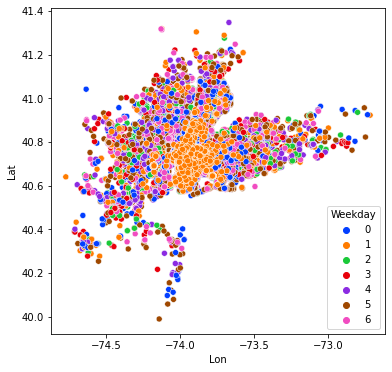

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(y="Lat",x="Lon",data=data,hue=data["Weekday"],palette="bright")
plt.show()